In [1]:
# importacao dos dados e visualizacao

import pandas as pd

tabela = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
tabela = tabela.drop(columns='customerID')
display(tabela)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
# verificando o numero de variaveis de cada coluna

tabela.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [3]:
# verificando se ha numeros vazios
tabela.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
# estatisticas basicas de colunas numericas

tabela['TotalCharges'] = pd.to_numeric(tabela['TotalCharges'], errors='coerce') # transformando a coluna TotalCharges para numerica
tabela.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
# eliminar linhas vazias
tabela = tabela.dropna()

In [6]:
# verificando a proporcao de cancelamento
proporcao = tabela['Churn'].value_counts(normalize=True).map('{:.1%}'.format)
display(proporcao)

Churn
No     73.4%
Yes    26.6%
Name: proportion, dtype: object

In [7]:
# criando uma nova coluna com categorias de Total Charges
import numpy as np

bins = [0 , 1300, 3999, np.inf]
labels = ['baixo', 'medio', 'alto']
tabela['TotalCharges_Category'] = pd.cut(tabela['TotalCharges'], bins=bins, labels=labels)

In [8]:
# Normalizando a coluna Churn

tabela['Churn'] = tabela['Churn'].replace({'No' : 0, 'Yes' : 1})


C:\Users\User\AppData\Local\Temp\ipykernel_25608\1333374420.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tabela['Churn'] = tabela['Churn'].replace({'No' : 0, 'Yes' : 1})


In [9]:
# agrupando colunas para calcular a media de Churn
taxa_genero = tabela.groupby('gender')['Churn'].mean()
df_taxa_genero = taxa_genero.reset_index()

taxa_internet_service = tabela.groupby('InternetService')['Churn'].mean()
df_taxa_internet_service = taxa_internet_service.reset_index()

taxa_contract = tabela.groupby('Contract')['Churn'].mean()
df_taxa_contract = taxa_contract.reset_index()

taxa_payment = tabela.groupby('PaymentMethod')['Churn'].mean()
df_taxa_payment = taxa_payment.reset_index()

taxa_multiplelines = tabela.groupby('MultipleLines')['Churn'].mean()
df_taxa_multiplelines = taxa_multiplelines.reset_index()

taxa_partner = tabela.groupby('Partner')['Churn'].mean()
df_taxa_partner = taxa_partner.reset_index()

taxa_security = tabela.groupby('OnlineSecurity')['Churn'].mean()
df_taxa_security = taxa_security.reset_index()

taxa_senior = tabela.groupby('SeniorCitizen')['Churn'].mean()
df_taxa_senior = taxa_senior.reset_index()

taxa_phoneservice = tabela.groupby('PhoneService')['Churn'].mean()
df_taxa_phoneservice = taxa_phoneservice.reset_index()

taxa_dependents = tabela.groupby('Dependents')['Churn'].mean()
df_taxa_dependents = taxa_dependents.reset_index()

taxa_tenure = tabela.groupby('tenure')['Churn'].mean()
df_taxa_tenure = taxa_tenure.reset_index()

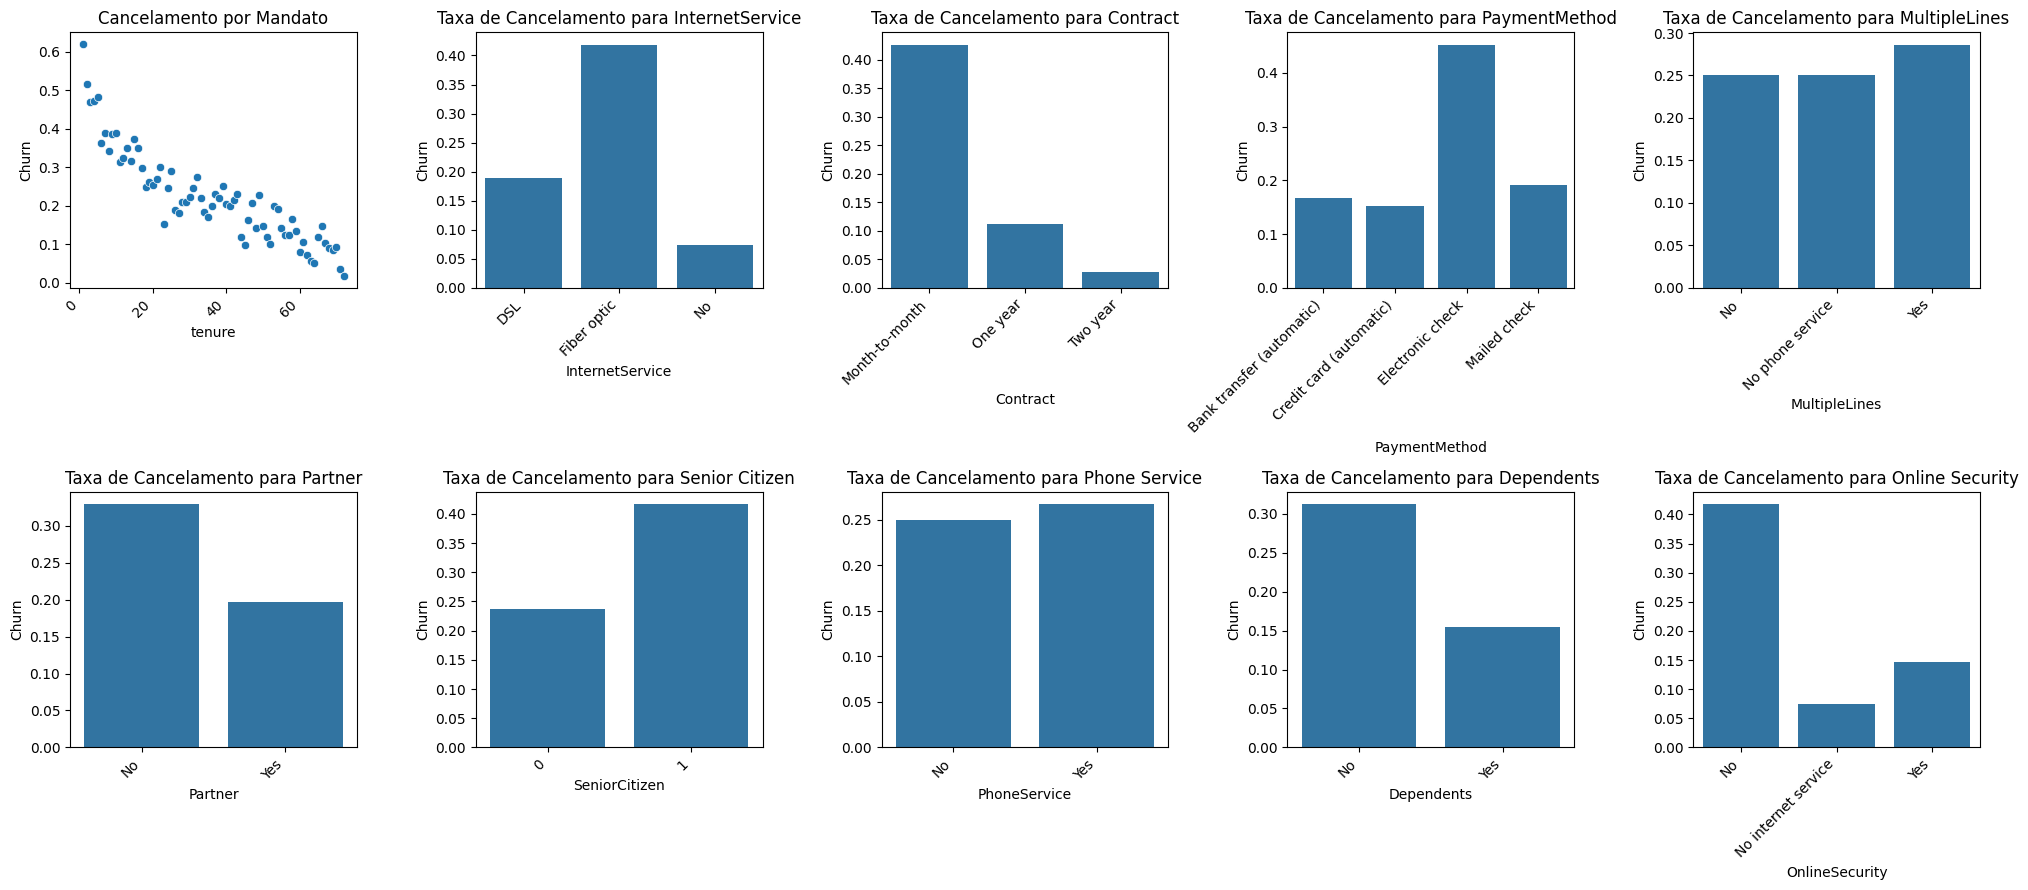

In [10]:
# visualizacoes de cada coluna de acordo com a taxa de cancelamento
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20,9))

plt.subplot(2, 5, 1)
sns.scatterplot(df_taxa_tenure, x='tenure', y='Churn')
plt.title('Cancelamento por Mandato')
plt.xticks(rotation=45, ha='right')   # Rotacionar os rótulos do eixo x para melhor legibilidade

plt.subplot(2, 5, 2)
sns.barplot(x='InternetService', y='Churn', data=df_taxa_internet_service)
plt.title('Taxa de Cancelamento para InternetService')
plt.xticks(rotation=45, ha='right') 

plt.subplot(2, 5, 3)
sns.barplot(x='Contract', y='Churn', data=df_taxa_contract)
plt.title('Taxa de Cancelamento para Contract')
plt.xticks(rotation=45, ha='right') 

plt.subplot(2, 5, 4)
sns.barplot(x='PaymentMethod', y='Churn', data=df_taxa_payment)
plt.title('Taxa de Cancelamento para PaymentMethod')
plt.xticks(rotation=45, ha='right') 

plt.subplot(2, 5, 5)
sns.barplot(x='MultipleLines', y='Churn', data=df_taxa_multiplelines)
plt.title('Taxa de Cancelamento para MultipleLines')
plt.xticks(rotation=45, ha='right') 

plt.subplot(2, 5, 6)
sns.barplot(x='Partner', y='Churn', data=df_taxa_partner)
plt.title('Taxa de Cancelamento para Partner')
plt.xticks(rotation=45, ha='right') 

plt.subplot(2, 5, 7)
sns.barplot(x='SeniorCitizen', y='Churn', data=df_taxa_senior)
plt.title('Taxa de Cancelamento para Senior Citizen')
plt.xticks(rotation=45, ha='right') 

plt.subplot(2, 5, 8)
sns.barplot(x='PhoneService', y='Churn', data=df_taxa_phoneservice)
plt.title('Taxa de Cancelamento para Phone Service')
plt.xticks(rotation=45, ha='right') 

plt.subplot(2, 5, 9)
sns.barplot(x='Dependents', y='Churn', data=df_taxa_dependents)
plt.title('Taxa de Cancelamento para Dependents')
plt.xticks(rotation=45, ha='right') 

plt.subplot(2, 5, 10)
sns.barplot(x='OnlineSecurity', y='Churn', data=df_taxa_security)
plt.title('Taxa de Cancelamento para Online Security')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [11]:

taxa_totalcharges = tabela.groupby('TotalCharges_Category')['Churn'].mean()
df_taxa_totalcharges = taxa_totalcharges.reset_index()

taxa_monthlycharges = tabela.groupby('MonthlyCharges')['Churn'].mean()
df_taxa_monthlycharges = taxa_monthlycharges.reset_index()

taxa_TV = tabela.groupby('StreamingTV')['Churn'].mean()
df_taxa_TV = taxa_TV.reset_index()

taxa_Movies = tabela.groupby('StreamingMovies')['Churn'].mean()
df_taxa_Movies = taxa_Movies.reset_index()

taxa_backup = tabela.groupby('OnlineBackup')['Churn'].mean()
df_taxa_backup = taxa_backup.reset_index()

taxa_protetion = tabela.groupby('DeviceProtection')['Churn'].mean()
df_taxa_protetion = taxa_protetion.reset_index()

taxa_techsupport = tabela.groupby('TechSupport')['Churn'].mean()
df_taxa_techsupport = taxa_techsupport.reset_index()

taxa_paper = tabela.groupby('PaperlessBilling')['Churn'].mean()
df_taxa_paper = taxa_paper.reset_index()

C:\Users\User\AppData\Local\Temp\ipykernel_25608\3613636926.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  taxa_totalcharges = tabela.groupby('TotalCharges_Category')['Churn'].mean()


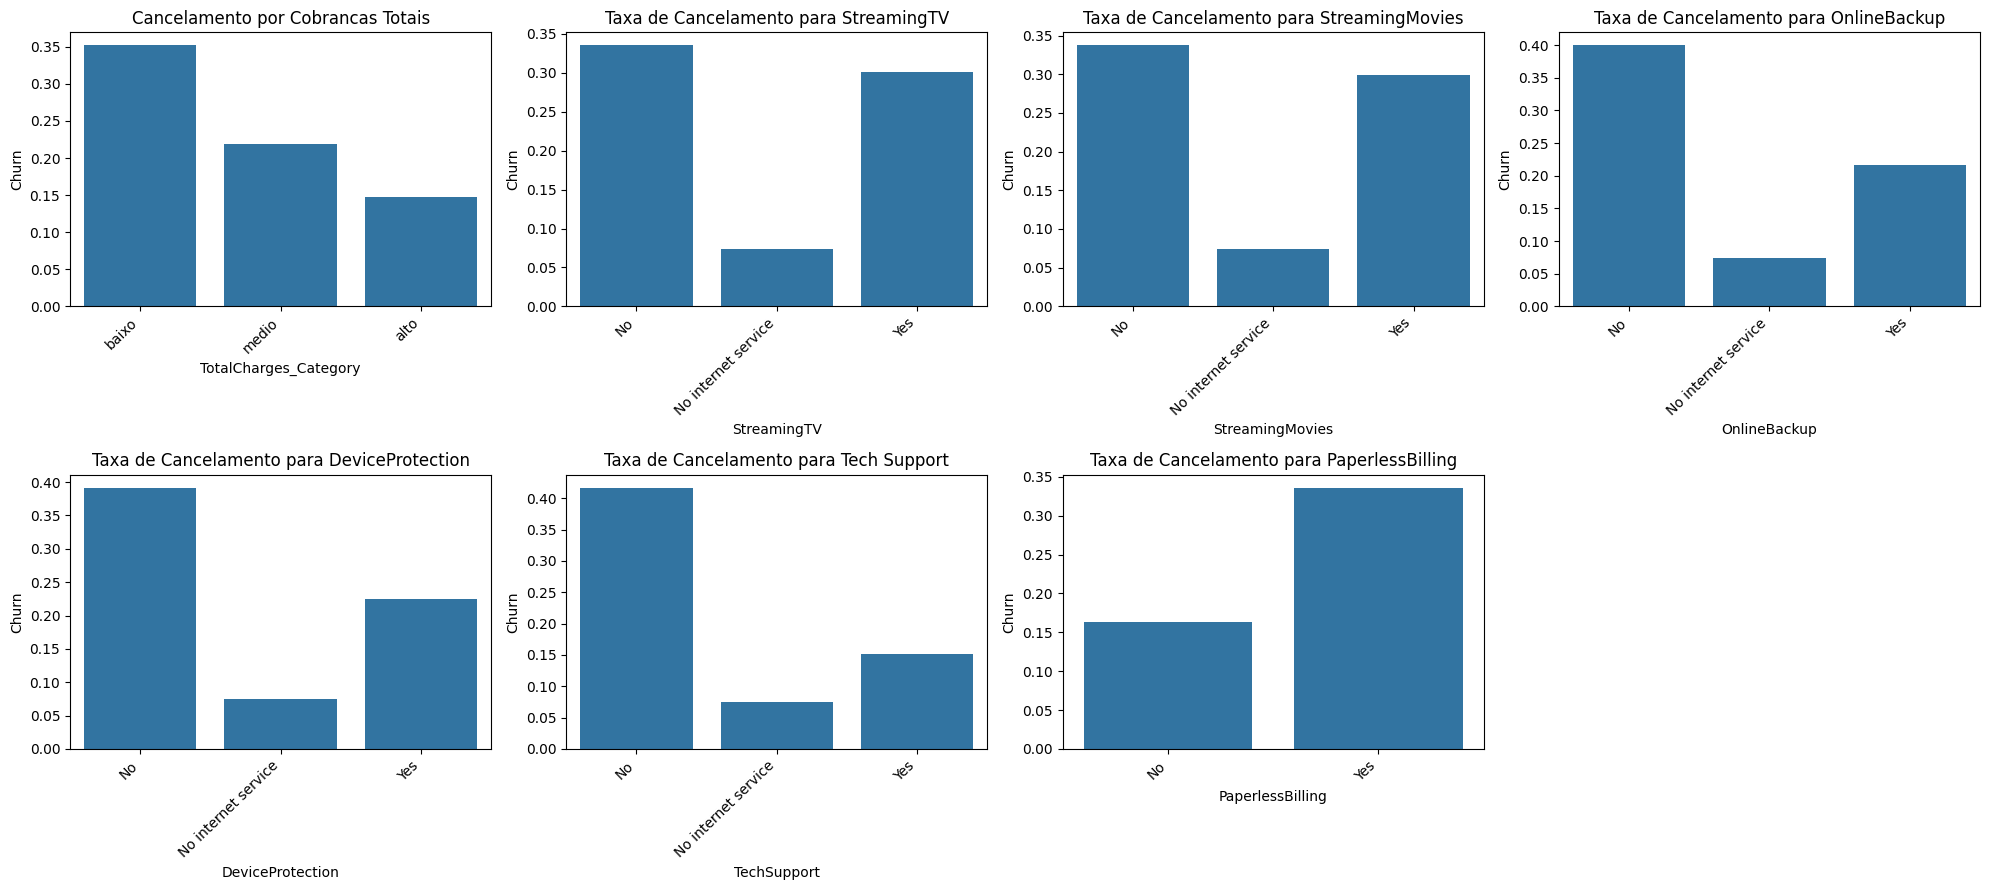

In [18]:
plt.figure(figsize=(20,9))

plt.subplot(2, 4, 1)
sns.barplot(df_taxa_totalcharges, x='TotalCharges_Category', y='Churn')
plt.title('Cancelamento por Cobrancas Totais')
plt.xticks(rotation=44, ha='right')

plt.subplot(2, 4, 2)
sns.barplot(x='StreamingTV', y='Churn', data=df_taxa_TV)
plt.title('Taxa de Cancelamento para StreamingTV')
plt.xticks(rotation=44, ha='right') 

plt.subplot(2, 4, 3)
sns.barplot(x='StreamingMovies', y='Churn', data=df_taxa_Movies)
plt.title('Taxa de Cancelamento para StreamingMovies')
plt.xticks(rotation=44, ha='right') 

plt.subplot(2, 4, 4)
sns.barplot(x='OnlineBackup', y='Churn', data=df_taxa_backup)
plt.title('Taxa de Cancelamento para OnlineBackup')
plt.xticks(rotation=44, ha='right') 

plt.subplot(2, 4, 5)
sns.barplot(x='DeviceProtection', y='Churn', data=df_taxa_protetion)
plt.title('Taxa de Cancelamento para DeviceProtection')
plt.xticks(rotation=44, ha='right') 

plt.subplot(2, 4, 6)
sns.barplot(x='TechSupport', y='Churn', data=df_taxa_techsupport)
plt.title('Taxa de Cancelamento para Tech Support')
plt.xticks(rotation=44, ha='right') 

plt.subplot(2, 4, 7)
sns.barplot(x='PaperlessBilling', y='Churn', data=df_taxa_paper)
plt.title('Taxa de Cancelamento para PaperlessBilling')
plt.xticks(rotation=44, ha='right') 

plt.tight_layout()
plt.show()

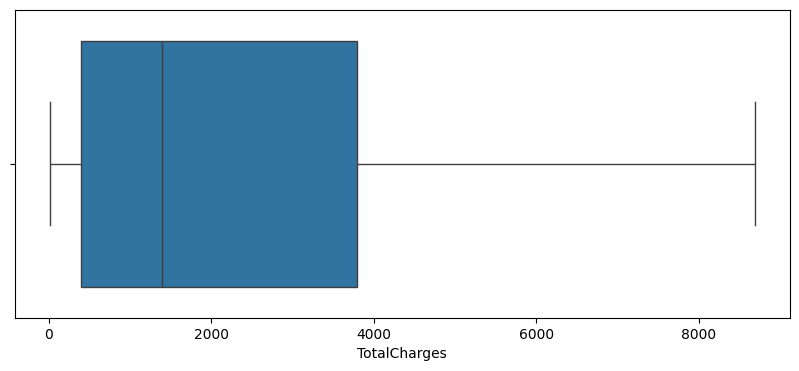

In [13]:
# analise de outliers

plt.figure(figsize=(10,4))
sns.boxplot(tabela, x='TotalCharges')
plt.show()

In [14]:
# olhando os outliers
outliers = tabela[tabela['TotalCharges']>4000]
display(outliers)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Category
12,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,0,alto
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,alto
15,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,0,alto
17,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,...,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,0,alto
26,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,1,alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,0,alto
7028,Female,0,Yes,No,68,Yes,No,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,0,alto
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,1,alto
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,alto


In [15]:
# proporcao de cancelamento dos outliers

proporcao = outliers['Churn'].value_counts(normalize=True).map('{:.1%}'.format)
display(proporcao)

Churn
0    85.3%
1    14.7%
Name: proportion, dtype: object

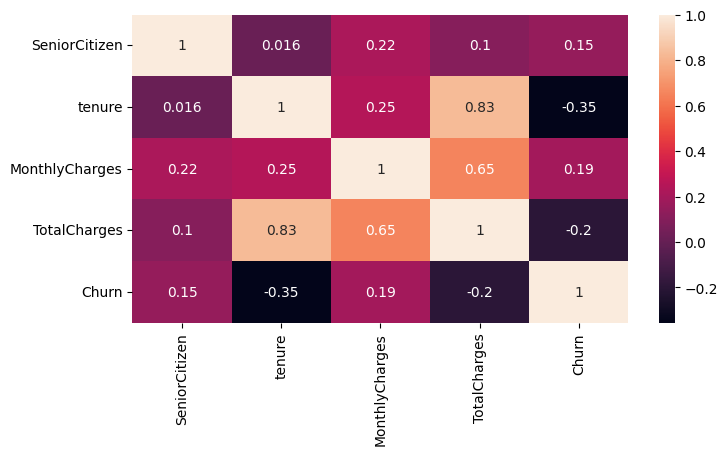

In [16]:
# verificar a correlacao
plt.figure(figsize=(8,4))
sns.heatmap(tabela.corr(numeric_only=True), annot=True)
plt.show()

In [17]:
tabela.to_csv("Telco_Recent.csv")